In [62]:
from keras.models import Model
from keras.layers import Input, Activation, merge, Dense, Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPool2D

from keras.layers import BatchNormalization, add, GlobalAveragePooling2D
from keras.models import Sequential
from keras.optimizers import Adam

from keras.utils import plot_model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import load_model

from keras.datasets import cifar10
from keras.utils import np_utils

import numpy as np
import matplotlib.pyplot as plt
!pip install scipy==1.2
from scipy.misc import toimage

In [0]:
(X_train, y_train),(X_test, y_test) = cifar10.load_data()


In [0]:
# floatに変換しておく
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# 正規化
X_train /= 255.0
X_test /= 255.0

# one-hot vector に変換したほうが都合が良い
n_classes = 10
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)

In [0]:
# CIFAR-10の教師データは 0 〜 9 までの数字になっているが、これだと人はわかりにくいので
# 0 → airplane, 1 → automobile…のような対応関係を配列で持っておく
cifar10_labels = np.array([
    'airplane',
    'automobile',
    'bird',
    'cat',
    'deer',
    'dog',
    'frog',
    'horse',
    'ship',
    'truck'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  app.launch_new_instance()


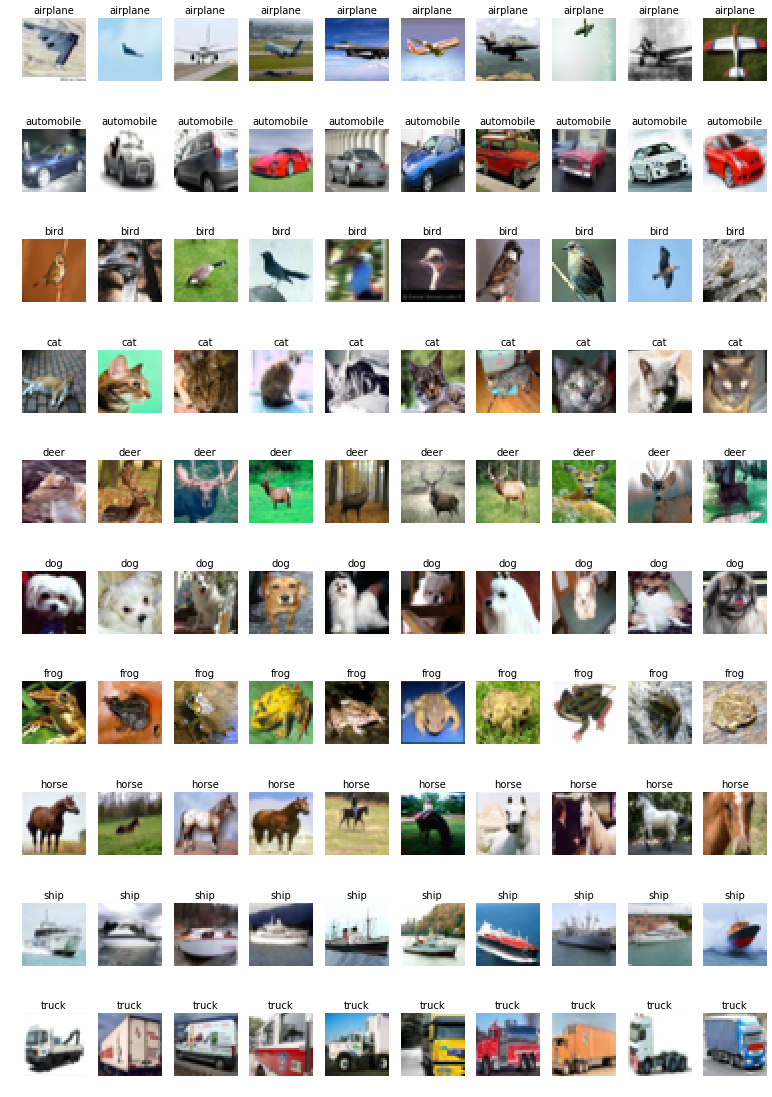

In [66]:
nclasses = 10
pos = 1
plt.figure(figsize=(16,24), dpi=60)

# matplotlib で学習用画像を10個ずつ表示する
for targetClass in range(nclasses):
    targetIdx = []
    for i in range(len(y_train)):
        if y_train[i][0] == targetClass:
            targetIdx.append(i)

    np.random.shuffle(targetIdx)
    for idx in targetIdx[:10]:
        # X_train[idx] は3次元の行列になっており、そのままだと数字の羅列が表示されるだけなので
        # toimage を使って画像に変換してから表示する
        img = toimage(X_train[idx])
        plt.subplot(10, 10, pos)
        plt.imshow(img)
        plt.axis('off')
        plt.title(cifar10_labels[y_train[idx][0]])
        pos += 1

plt.show()

In [67]:
#VGGっぽく実装 VGGってなに？というのは今度

# モデルの定義
model = Sequential()


# 3×3、32チャンネルのフィルタを3回かける。padding=sameで、入力データの周りを0でパディングすることで
model.add(Conv2D(32,(3,3), padding='same', input_shape=(32,32,3)))
model.add(Activation('relu'))
model.add(Conv2D(32,(3,3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(32,(3,3), padding='same'))
model.add(Activation('relu'))
#最大値poolingする。
model.add(MaxPool2D(pool_size=(2,2)))

# (VGGNetの指針に従って、1/2にpolingしたからチャンネル数を2倍にする。)

model.add(Conv2D(64,(3,3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64,(3,3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64,(3,3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))


# (VGGNetの指針に従って、1/2にpolingしたからチャンネル数を2倍にする。)

model.add(Conv2D(128,(3,3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(128,(3,3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(128,(3,3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

#全結合層に入れる。
model.add(GlobalAveragePooling2D())
model.add(Dense(1024))
model.add(Activation('relu'))


model.add(Dense(n_classes, activation='softmax'))

adam = Adam(lr=1e-3)

model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=["accuracy"])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_55 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_63 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_64 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_65 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 16, 16, 32)        0         
__________

In [68]:
batch_size = 50
nb_epoch = 10
validation_split=0.1

history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_split=validation_split)


Train on 45000 samples, validate on 5000 samples
Epoch 1/10
45000/45000 [==============================] - 12s 267us/step - loss: 1.7621 - acc: 0.3321 - val_loss: 1.5515 - val_acc: 0.4260
Epoch 2/10
45000/45000 [==============================] - 10s 227us/step - loss: 1.2770 - acc: 0.5339 - val_loss: 1.0424 - val_acc: 0.6254
Epoch 3/10
45000/45000 [==============================] - 10s 226us/step - loss: 0.9917 - acc: 0.6421 - val_loss: 0.8964 - val_acc: 0.6730
Epoch 4/10
45000/45000 [==============================] - 10s 228us/step - loss: 0.8242 - acc: 0.7059 - val_loss: 0.8037 - val_acc: 0.7190
Epoch 5/10
45000/45000 [==============================] - 10s 227us/step - loss: 0.6982 - acc: 0.7552 - val_loss: 0.7546 - val_acc: 0.7366
Epoch 6/10
45000/45000 [==============================] - 10s 223us/step - loss: 0.6084 - acc: 0.7864 - val_loss: 0.7230 - val_acc: 0.7594
Epoch 7/10
45000/45000 [==============================] - 10s 221us/step - loss: 0.5339 - acc: 0.8120 - val_loss: 0.7

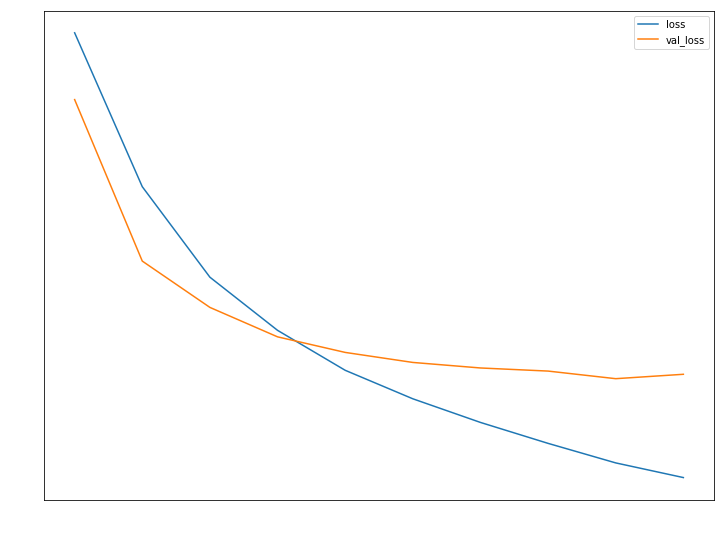

In [77]:
import numpy as np
import matplotlib.pyplot as plt
# 損失関数の値の推移
epoch_array = np.array(range(nb_epoch))
plt.figure(figsize=(12,9))
plt.plot(epoch_array, history.history['loss'], history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.tick_params(colors='white')
plt.xlabel("# of epoch",color="white")
plt.ylabel("cost function",color="white")
plt.show()

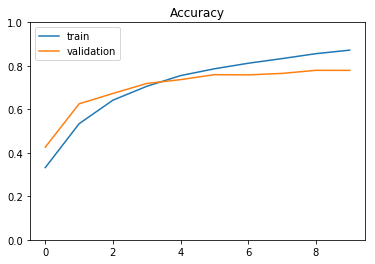

In [78]:
import numpy as np
import matplotlib.pyplot as plt

epoch = np.arange(len(history.history['acc']))

# accuracy と validation accuracy の推移をプロットする
# trainが学習データに対する正解率。validationが学習に使用していないデータに対する正解率。
#このアルゴリズムはResNetの簡易版なので、validationに対する正解率は70%くらいだが、真面目にやれば9割くらいでる。
plt.title('Accuracy')
plt.ylim(0.0, 1.0)
plt.plot(epoch, history.history['acc'], label='train')
plt.plot(epoch, history.history['val_acc'], label='validation')
plt.legend()
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  import sys


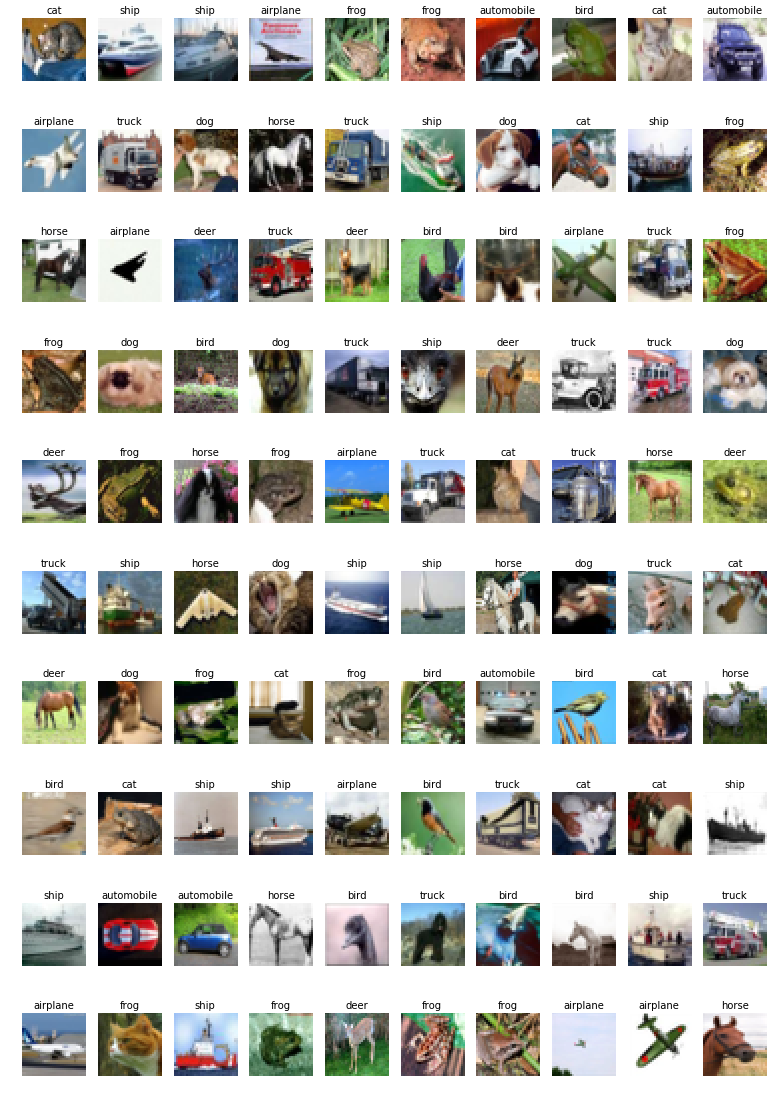

In [79]:
#テストデータに対する確認の視覚化
results = model.predict(X_test)

pos = 1
plt.figure(figsize=(16,24), dpi=60)

for i in range(100):
  img = toimage(X_test[i])
  label = results[i].argmax()
  plt.subplot(10, 10, pos)
  plt.imshow(img)
  plt.axis('off')
  plt.title(cifar10_labels[label])
  pos += 1        

plt.show()